# Machine learning based prediction MDR gonococcal infections #
by: JEAN-PIERRE GNIMATIN (www.linkedin.com/in/jean-pierre-gnimatin)

$ Brief description$

This python code was used for the ML section of the following manuscript:
*Correlates and Machine Learning-Based Prediction of Multidrug resistant Gonococcal infections in the Province of Québec, Canada*


Preliminary descriptive statistics and explorations will be present in the published article.

Link to the published version of the article will be added later.

### Importing libraries ###

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, jaccard_score, roc_curve, auc

### Importing the dataset ###

In [19]:
import pandas as pd

# Defining the file path
file_path = r'/content/dataml.xlsx'

# Importing the dataset
data = pd.read_excel(file_path)

# Display the first few rows of the dataset
data.head()


,NUM,IDEPISODE,ANNEE,SITE,SEXE,SEXEPART,ORIENTSEX,AGE,AGE_GROUP,REG_CAT,...,ATCHERPG,ATCVPH,ATCTRICHO,ATCITSSAUT,ATCITSSINC,resistant_CIPRO,increased_CEFTRI,increased_CEFI,resistant_AZI,resistant_TETRA
0,495,526,2017,Urogenital,Male,Female,HSM,26,25 to 35,Outside,...,2.0,2.0,2.0,2,2,0,0,0,0,1
1,496,527,2017,Urogenital,Male,Male,BMSM,39,More than 35,Montreal,...,2.0,2.0,2.0,2,2,1,0,0,0,0
2,497,528,2017,Rectal,Male,Male,BMSM,20,Less than 25,Montreal,...,2.0,2.0,2.0,2,2,1,0,0,0,0
3,534,569,2017,Rectal,Male,Male,BMSM,30,25 to 35,Montreal,...,NaN,NaN,NaN,2,2,0,0,0,0,0
4,537,572,2017,Urogenital,Male,Male,BMSM,33,25 to 35,Outside,...,NaN,NaN,NaN,2,2,0,0,0,0,1


### Updating the dataset ###

In [22]:
# List of variables to keep
variables_to_keep = ['SITE', 'ORIENTSEX', 'AGE_GROUP', 'REG_CAT', 'NBPART_GROUP', 'PREVIOUS', 'QUINTMAT', 'MDRstatus']

In [23]:
# Update the dataset by dropping all variables except the ones in the list
data = data[variables_to_keep]

### Characteristics of the dataset ###

In [24]:
print("data shape", data.shape)

print("-----------------------------------------")

print("data info", data.info())

print("-----------------------------------------")

print("Dataset description", data.describe())

data shape (775, 8)
-----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SITE          775 non-null    object
 1   ORIENTSEX     775 non-null    object
 2   AGE_GROUP     775 non-null    object
 3   REG_CAT       775 non-null    object
 4   NBPART_GROUP  775 non-null    object
 5   PREVIOUS      775 non-null    object
 6   QUINTMAT      775 non-null    object
 7   MDRstatus     775 non-null    object
dtypes: object(8)
memory usage: 48.6+ KB
data info None
-----------------------------------------
Dataset description               SITE ORIENTSEX     AGE_GROUP   REG_CAT NBPART_GROUP  \
count          775       775           775       775          775   
unique           3         4             3         2            4   
top     Urogenital      BMSM  More than 35  Montreal       2 to 4   
freq           540  

### Feature engineering ###

In [25]:
# Encoding categorical features
data_encoded = pd.get_dummies(data, columns=['SITE', 'ORIENTSEX', 'AGE_GROUP', 'REG_CAT', 'NBPART_GROUP', 'PREVIOUS',  'QUINTMAT'], drop_first=True)

In [26]:
# Defining for oversampling train set using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(data_encoded.drop('MDRstatus', axis=1), data_encoded['MDRstatus'])


In [27]:
# Splitting dataset into train, validation, and test sets
X_train_valid, X_test, Y_train_valid, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_valid, Y_train_valid, test_size=0.25, random_state=42)

### Machine learning Predictions ###

In [28]:
# Logistic regression
lor_model = LogisticRegression(random_state=42)
lor_model.fit(X_train, Y_train)
lor_pred = lor_model.predict(X_valid)

# Support vector machine
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, Y_train)
svm_pred = svm_model.predict(X_valid)

# Decision tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, Y_train)
dt_pred = dt_model.predict(X_valid)

# Random forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, Y_train)
rf_pred = rf_model.predict(X_valid)

# Gradient Boosting Machine (GBM)
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train, Y_train)
gbm_pred = gbm_model.predict(X_valid)

# k-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, Y_train)
knn_pred = knn_model.predict(X_valid)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)
nb_pred = nb_model.predict(X_valid)

### Evaluating the performance of the ML models ###

In [29]:
# Performance metrics
models = [lor_model, svm_model, rf_model, dt_model, gbm_model, knn_model, nb_model]
model_names = ['Logistic Regression', 'Support Vector Machine', 'Random Forest', 'Decision Tree', 'GBM', 'KNN', 'Naive Bayes']

for model, name in zip(models, model_names):
    Y_pred = model.predict(X_test)

    print(f"\nMetrics for {name}:")
    print("Accuracy:", accuracy_score(Y_test, Y_pred))
    print("Precision:", precision_score(Y_test, Y_pred, pos_label='Positif'))
    print("Recall:", recall_score(Y_test, Y_pred, pos_label='Positif'))
    print("F1 Score:", f1_score(Y_test, Y_pred, pos_label='Positif'))
    print("Jaccard Score:", jaccard_score(Y_test, Y_pred, pos_label='Positif'))


Metrics for Logistic Regression:
Accuracy: 0.8088235294117647
Precision: 0.8288288288288288
Recall: 0.736
F1 Score: 0.7796610169491526
Jaccard Score: 0.6388888888888888

Metrics for Support Vector Machine:
Accuracy: 0.75
Precision: 1.0
Recall: 0.456
F1 Score: 0.6263736263736264
Jaccard Score: 0.456

Metrics for Random Forest:
Accuracy: 0.8308823529411765
Precision: 0.8264462809917356
Recall: 0.8
F1 Score: 0.8130081300813008
Jaccard Score: 0.684931506849315

Metrics for Decision Tree:
Accuracy: 0.8088235294117647
Precision: 0.8016528925619835
Recall: 0.776
F1 Score: 0.7886178861788617
Jaccard Score: 0.6510067114093959

Metrics for GBM:
Accuracy: 0.8161764705882353
Precision: 0.8099173553719008
Recall: 0.784
F1 Score: 0.7967479674796748
Jaccard Score: 0.6621621621621622

Metrics for KNN:
Accuracy: 0.8014705882352942
Precision: 0.7886178861788617
Recall: 0.776
F1 Score: 0.782258064516129
Jaccard Score: 0.6423841059602649

Metrics for Naive Bayes:
Accuracy: 0.7904411764705882
Precision: 1

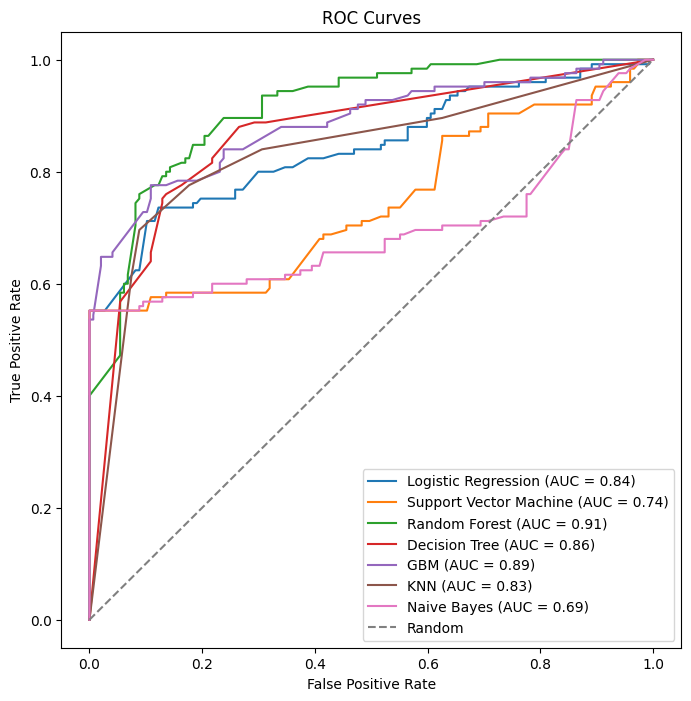

In [31]:
# Function to plot ROC curve

# importing libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, jaccard_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt



def plot_roc_curve(models, X_test, Y_test, model_names):
    plt.figure(figsize=(8, 8))
    for model, name in zip(models, model_names):
        Y_pred_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(Y_test, Y_pred_prob, pos_label='Positif')
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend()
    plt.show()

# Plot ROC curves
plot_roc_curve(models, X_test, Y_test, model_names)